<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [2]:
def uniform_cost_search(graph, start, goal):
    """Finds the minimum-cost path using Uniform Cost Search (UCS)."""
    pq = PriorityQueue()
    pq.put((0, start, []))  # (cost, current_node, path)
    visited = set()
    explored_nodes = []

    while not pq.empty():
        cost, node, path = pq.get()

        if node in visited:
            continue

        path = path + [node]
        visited.add(node)
        explored_nodes.append(node)

        if node == goal:
            return cost, path, explored_nodes  # Return min cost, path, and explored nodes

        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                pq.put((cost + weight, neighbor, path))

    return float("inf"), [], explored_nodes  # No path found

Uniform Cost Search:
Minimum cost: 4
Optimal path: A -> B -> C -> D


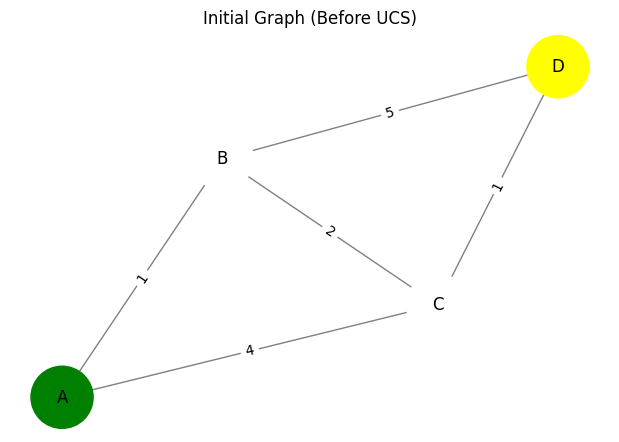

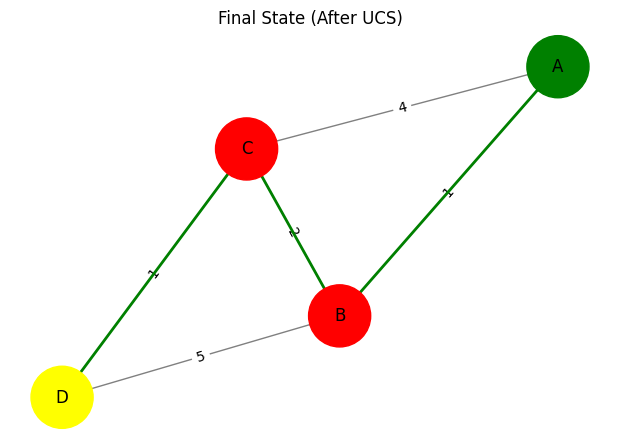

In [3]:
def draw_graph(graph, path=[], explored_nodes=[], title="Graph Visualization", weighted=True):
    """Visualizes the graph, highlighting the explored nodes and final path."""
    G = nx.Graph()

    for node, edges in graph.items():
        for edge in edges:
            if weighted:
                G.add_edge(node, edge[0], weight=edge[1])
            else:
                G.add_edge(node, edge)

    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)} if weighted else None

    plt.figure(figsize=(6, 4))
    node_colors = ['red' if node in explored_nodes else 'white' for node in G.nodes()]
    node_colors[0] = 'green'  # Start node
    node_colors[-1] = 'yellow'  # Goal node

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=2000, font_size=12, edge_cmap=plt.cm.Blues)
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

    plt.title(title)
    plt.show()

# Example graph representation (weighted adjacency list)
weighted_graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

start, goal = 'A', 'D'
ucs_cost, ucs_path, explored_nodes = uniform_cost_search(weighted_graph, start, goal)

print("Uniform Cost Search:")
print("Minimum cost:", ucs_cost)
print("Optimal path:", " -> ".join(ucs_path))

draw_graph(weighted_graph, [], [], "Initial Graph (Before UCS)")  # Initial State
draw_graph(weighted_graph, ucs_path, explored_nodes, "Final State (After UCS)")  # Final State
